### GIS 관련 파이썬 코드
#### 패키지 참조

In [2]:
from hossam.util import hs_load_data
from hossam.gis import hs_load_shape,hs_geocode,hs_save_shape


#라이브러리 기본 참조
from pandas import DataFrame
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
import numpy as np

c:\Users\itwill\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
#한글을 지원하는 폰트 파일의 경로
font_path ='C:/Data_Analysis_Basic/[LAB-06] 데이터 시각화 개요/NotoSansKR-Regular.ttf'
#폰트의 그룹을 시스템에 등록
fm.fontManager.addfont(font_path)
#폰트의 속성을 읽어옴
font_prop = fm.FontProperties(fname=font_path)
#읽어온 속성에서 폰트의 이름만 추출
font_name = font_prop.get_name()

#이미지의 선명도를 결정 (1인치 당 픽셀의 수)
my_dpi = 120 
#시스템에 등록된 글꼴 이름  (상단에서 확인한 폰트 이름으로 넣기)
my_font_name = 'Noto Sans KR'
#그림 스타일 지정
my_theme = 'dark'
#seaborn 스타일 (화풍 설정하기)
sb.set_theme(style=my_theme)
#그래프에 한글 폰트 적용
plt.rcParams['font.family']=my_font_name
#기본 폰트 크기
plt.rcParams['font.size'] =16
#그래프에 마이너스 꺠짐 방지 (한글환경에서 필수)
plt.rcParams['axes.unicode_minus']=False

#### shape 파일 불러오기

In [7]:
shp = hs_load_shape("강남구_행정동경계(EPSG5181-KGD2002,UTF8).shp",info=False)
shp

,ADM_CD,Name,geometry
0,1123051,Sinsa-dong,"POLYGON ((201346.341 447261.756, 201346.341 44..."
1,1123052,Nonhyun-1dong,"POLYGON ((202998.923 445317.508, 202869.691 44..."
2,1123053,Nonhyun-2dong,"POLYGON ((203648.606 446415.981, 203681.418 44..."
3,1123058,Samseong-1dong,"POLYGON ((205785.274 447286.703, 205962.869 44..."
4,1123059,Samseong-2dong,"POLYGON ((205011.469 445268.745, 204954.574 44..."
5,1123060,Daechi-1dong,"POLYGON ((205787.407 443466.859, 205806.867 44..."
6,1123063,Daechi-4dong,"POLYGON ((205367.864 444375.266, 205347.13 444..."
7,1123064,Yeoksam-1dong,"POLYGON ((204331.353 445006.453, 204331.49 445..."
8,1123065,Yeoksam-2dong,"POLYGON ((204674.363 444096.369, 204674.635 44..."
9,1123066,Dogok-1dong,"POLYGON ((203692.483 442888.65, 203692.483 442..."


#### shape 직접 시각화

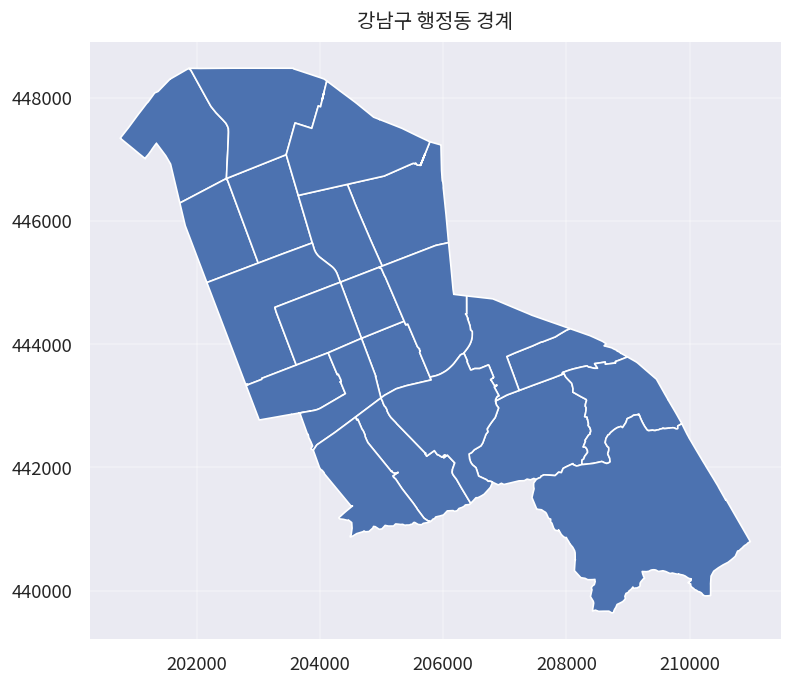

In [8]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280              # 그래프 가로 크기
height_px = 720              # 그래프 세로 크기
rows = 1                     # 그래프 행 수
cols = 1                     # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)


shp.plot(ax=ax)
ax.set_title('강남구 행정동 경계' , fontsize =12 , pad=8)
ax.grid(True , alpha = 0.3) #배경 격자 표시


# 4) 출력
plt.tight_layout()                     # 여백 제거
plt.show()                             # 그래프 화면 출력
plt.close()                            # 그래프 작업 종료


#### 엑셀 파일 불러오기
pandas 의 read_excel 함수를 사용하는 것이 원래 방법

In [16]:
origin = hs_load_data('서울_행정기관.xlsx')


✅ 테이블 정보
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   기관유형     1143 non-null   object
 1   기관유형별분류  1143 non-null   object
 2   대표기관명    1143 non-null   object
 3   전체기관명    1143 non-null   object
 4   최하위기관명   1143 non-null   object
 5   대표전화번호   1143 non-null   object
 6   새우편번호    1143 non-null   int64 
 7   도로명주소    1143 non-null   object
dtypes: int64(1), object(7)
memory usage: 71.6+ KB


✅ 상위 5개 행
+---+----------+-------------------+--------------------+-----------------------------------------------------------------------------+----------------------------+--------------+------------+---------------------------------------------------------+
|   | 기관유형 |  기관유형별분류   |     대표기관명     |                                 전체기관명                                  |        최하위기관명        | 대표전화번호 | 새우편번호 |                       도로명주소                  

#### Geocoding
PPT 32- 50 페이지 내용 대체

In [18]:
df  = hs_geocode(origin,key='6A3CCA26-916C-3E8F-B21B-76DB33266532' , addr ='도로명주소')
df.head()

ℹ️요청 데이터 개수: 1143


 12%|█▏        | 134/1143 [00:20<02:41,  6.24it/s, success=133, fail=1]

⚠️[Warning] 주소를 찾을 수 없습니다. (132) -> 서울특별시 강남구 광평로 301-4


 14%|█▍        | 165/1143 [00:25<02:23,  6.83it/s, success=163, fail=2]

⚠️[Warning] 주소를 찾을 수 없습니다. (163) -> 서울특별시 강남구 개포로 607


 19%|█▉        | 221/1143 [00:33<02:14,  6.84it/s, success=218, fail=3]

⚠️[Warning] 주소를 찾을 수 없습니다. (219) -> 서울특별시 영등포구 대림로197


 33%|███▎      | 377/1143 [00:57<01:54,  6.67it/s, success=373, fail=4]

⚠️[Warning] 주소를 찾을 수 없습니다. (375) -> 서울특별시 양천구 목동동로 154 (신정동)


 84%|████████▍ | 965/1143 [02:27<00:27,  6.58it/s, success=960, fail=5]

⚠️[Warning] 주소를 찾을 수 없습니다. (963) -> 서울특별시 성북구 정릉로26길 1 (정릉동)


 87%|████████▋ | 990/1143 [02:31<00:23,  6.50it/s, success=984, fail=6]

⚠️[Warning] 주소를 찾을 수 없습니다. (988) -> 서울특별시 성북구 돌곶이로27길 12 (장위동)


 88%|████████▊ | 1006/1143 [02:33<00:20,  6.72it/s, success=999, fail=7]

⚠️[Warning] 주소를 찾을 수 없습니다. (1004) -> 서울특별시 성북구 한천로 657 (장위동)


 99%|█████████▊| 1127/1143 [02:51<00:02,  6.64it/s, success=1119, fail=8]

⚠️[Warning] 주소를 찾을 수 없습니다. (1125) -> 서울특별시 도봉구 도봉로 686


100%|██████████| 1143/1143 [02:58<00:00,  6.42it/s, success=1135, fail=8]

✅총 1143개의 데이터 중 1135개의 데이터가 처리되었습니다.


,기관유형,기관유형별분류,대표기관명,전체기관명,최하위기관명,대표전화번호,새우편번호,도로명주소,latitude,longitude
0,지자체,8읍면동_동,서울특별시,서울특별시 금천구 시흥3동주민센터,시흥3동주민센터,02-2627-2517,8653,서울특별시 금천구 시흥대로18길 40 (시흥동),37.440267,126.905814
1,우정,우정_우체국,과학기술정보통신부,과학기술정보통신부 서울지방우정청 서울구로우체국 서울시흥3동우편취급국,서울시흥3동우편취급국,02-803-0205,8640,서울특별시 금천구 시흥대로 77,37.440996,126.903065
2,우정,우정_우체국,과학기술정보통신부,과학기술정보통신부 서울지방우정청 서울구로우체국 남서울한양아파트우편취급국,남서울한양아파트우편취급국,02-808-1310,8638,서울특별시 금천구 시흥대로39길 16,37.447298,126.902308
3,지자체,소방_119_안전센터,서울특별시,서울특별시 금천소방서 시흥119안전센터,시흥119안전센터,02-6981-6551,8636,서울특별시 금천구 시흥대로 45길 31(시흥동),37.448544,126.900484
4,지자체,8읍면동_동,서울특별시,서울특별시 서초구 내곡동주민센터,내곡동주민센터,02-2155-7934,6802,"서울특별시 서초구 청계산로15길 77, 내곡열린문화센터 2층",37.449265,127.058229


In [19]:
hs_save_shape(df,'서울_행정기관_도로명주소_활용.shp' , lat_col='latitude' , lon_col = 'longitude')

✅ Shapefile 저장 완료: 서울_행정기관_도로명주소_활용.shp (CRS: EPSG:4326)
